<a href="https://colab.research.google.com/github/MrSantoshkumar/PYTHON-IITM/blob/main/Stats2_Act_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extra Activity 5

Fitting distribution to data

We need to create a Google Colab notebook with:



1.   Histogram for the data.
2.   Fit one of the known distributions to the data.
3.   Calculate method of moments estimate and ML estimate for the unknown     parameter(s) of the selected distribution.
4.   Use the bootstrap method to form approximate confidence intervals for the parameters, if applicable.








# IMPORTING ALL NECESSARY PACKAGES

In [ ]:
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt

# For generating a Gamma Distribution Data

In [ ]:
# # Set the shape and scale parameters of the gamma distribution

# shape = 2
# scale = 3

# # Generate a scores dataset of size n with the gamma distribution
# n = 1000
# scores = np.random.gamma(shape, scale, n)

# Changing Data to DataFrame

In [ ]:
# df = pd.DataFrame(scores)
# df

# Extracting as .xlsx File

In [ ]:

# df.to_excel('/content/drive/MyDrive/stats2 course/Week 9/Extra Activity 6 - Week 9.xlsx')

#Importing data set
We will use the pandas module in python to read the excel file.

#Mount the Google Drive
Give Authorization of drive then go to files here right in the side bar, navigate to the file and click on three dot, click on copy path then paste the path down here

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_excel(r'/content/gdrive/MyDrive/stats2course/week9/extraactivity5.xlsx',index_col=None)
df

,Data
0,3.515175
1,2.594937
2,4.156913
3,4.795458
4,11.129027
...,...
995,3.738553
996,4.664038
997,5.459091
998,7.492643


# Histogram for the data.

We see that there are 1000 samples of data. To get a sense of the distribution, we should plot a histogram.

(array([292., 337., 193., 100.,  39.,  19.,  13.,   6.,   0.,   1.]),
 array([1.83331030e-02, 3.13519016e+00, 6.25204722e+00, 9.36890429e+00,
        1.24857613e+01, 1.56026184e+01, 1.87194755e+01, 2.18363325e+01,
        2.49531896e+01, 2.80700467e+01, 3.11869037e+01]),
 <BarContainer object of 10 artists>)

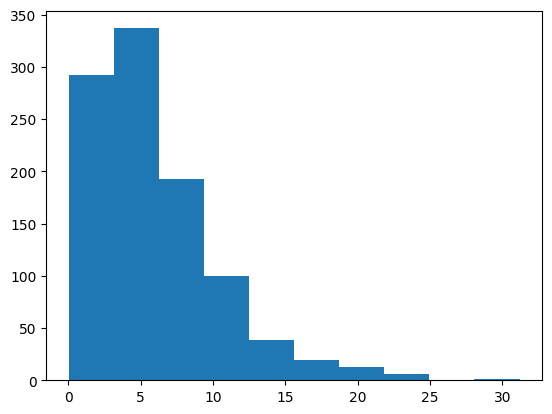

In [ ]:
plt.hist(df[df.columns[0]], bins=10)



```
# This is formatted as code
```

From the histogram, the distribution could be modelled as Gamma$(\alpha,\beta)$. The next step is to estimate $\alpha$ and $\beta$ from the given samples.


# Estimator identified by using Methods of moments

Suppose $m_1$ and $m_2$ are the first and second moments of the samples. The method of moments estimates are obtained by solving
$$m_1=\frac{\alpha}{\beta},$$
$$m_2=\frac{\alpha^2}{\beta^2}+\frac{\alpha}{\beta^2}.$$
The solution results in
$$\hat{\alpha}_{MM}=\frac{m_1^2}{m_2-m_1^2}=\frac{m_1^2}{s^2},\hat{\beta}_{MM}=\frac{m_1}{m_2-m_1^2}=\frac{m_1}{s^2}.$$
We now compute the values of $m_1$ (sample mean) and $s^2=m_2-m_1^2$ (sample variance) from the data. After that, we can compute the estimates.

In [ ]:
x = np.array(df)
m1 = np.average(x)
ss= np.var(x)
print(m1)
print(ss)

5.963113070706504
18.677691072126844


# Identifying Estimator using method of moments

In [ ]:
alphaMM = m1*m1/ss
betaMM = m1/ss
print(alphaMM)
print(betaMM)

1.9038069189984543
0.31926393084022026


# Plotting the estimate to check if it gives reasonable fit

We can plot the density of the Gamma on top of the density histogram to check if the estimate gives a reasonable fit.

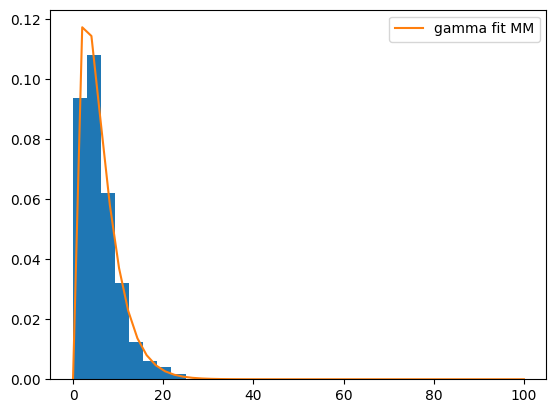

In [ ]:
fig, ax = plt.subplots(1,1)
ax.hist(x,density=True, bins=10)
xx = np.linspace(0,100,50)
ax.plot(xx, st.gamma.pdf(xx,alphaMM,scale=1/betaMM),label='gamma fit MM')
ax.legend (loc='best')
plt.show()

# Bootstrap

How do we find the bias and variance of the estimator?
Theoretical derivations of the sampling distributions may be too cumbersome and difficult in most cases.

Bootstrap is a Monte Carlo simulation method for computing metrics such as bias, variance and confidence intervals for estimators.

In the above example, we have found $\hat{\alpha}_{MM}=1.9038...$ and $\hat{\beta}_{MM}=0.3192...$.

Using these values, we simulate $n=1000$ *iid* samples from Gamma$(1.9038...,0.3192...)$ and, using the simulated samples, we compute new estimates of $\alpha$ and $\beta$ and call them $\hat{\alpha}_{MM}(1)$ and $\hat{\beta}_{MM}(1)$.

Now, repeat the simulation $N$ times to get estimates $\hat{\alpha}_{MM}(i)$ and $\hat{\beta}_{MM}(i)$, $i=1,2,\ldots,N$.

The sample variance of $\{\hat{\alpha}_{MM}(1), \hat{\alpha}_{MM}(2),\ldots,\hat{\alpha}_{MM}(N)\}$ is taken to be the bootstrap estimate for the variance of the estimator.

In [ ]:
N = 1000
n = 1000
alpha_hat = np.zeros(N)
beta_hat = np.zeros(N)
for i in np.arange(N):
  xi = st.gamma.rvs(alphaMM, scale=1/betaMM, size=n)
  mli = np.average(xi); ssi = np.var(xi)
  alpha_hat[i] =mli * mli/ssi; beta_hat[i]= mli/ssi

# Histogram of estimates

We can see the histograms of the estimates to get an idea of the spread of the values.

(array([ 0.84094835,  1.83479641, 10.4736295 , 17.81281513, 19.49471184,
        14.83127097,  7.18628593,  3.05799401,  0.7644985 ,  0.1528997 ]),
 array([0.26273883, 0.2758193 , 0.28889977, 0.30198024, 0.31506071,
        0.32814118, 0.34122165, 0.35430212, 0.36738259, 0.38046306,
        0.39354353]),
 <BarContainer object of 10 artists>)

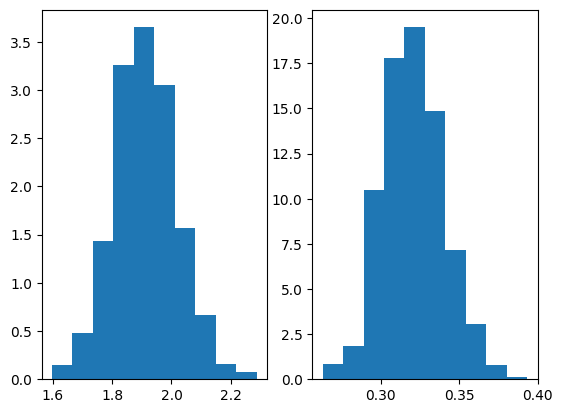

In [ ]:
ax1 = plt.subplot(121)
ax1.hist(alpha_hat, density= True)
ax2 = plt.subplot(122)
ax2.hist(beta_hat, density= True)

Notice how the histograms look roughly normal.

The sample standard deviations of the estimates is a bootstrap estimate for the standard error of the estimator.

In [ ]:
print(np.sqrt(np.var(alpha_hat)))
print(np.sqrt(np.var(beta_hat)))

0.10573603647826563
0.019533107430371253


# Confidence intervals

Suppose a parameter $\theta$ is estimated as $\hat{\theta}$, and suppose the distribution of $\hat{\theta}-\theta$ is known. Then, to obtain $(100(1-\alpha))$% confidence intervals (typical values are $\alpha=0.1$ for 90% confidence intervals and $\alpha=0.05$ for 95% confidence intervals), we use the CDF of $\hat{\theta}-\theta$ to obtain $\delta_1$ and $\delta_2$ such that
$$P(\hat{\theta}-\theta\le\delta_1)=1-\frac{\alpha}{2},$$
$$P(\hat{\theta}-\theta\le\delta_2)=\frac{\alpha}{2}.$$
Actually, the inverse of the CDF of $\hat{\theta}-\theta$ is used to find the above $\delta_1$ and $\delta_2$. From the above, we see that
$$P(\hat{\theta}-\theta \le \delta_1)-P(\hat{\theta}-\theta \le \delta_2)= P(\delta_2< \hat{\theta}-\theta \le \delta_1)=1-\frac{\alpha}{2}-\frac{\alpha}{2}=1-\alpha.$$
The above is rewritten as
$$P(\hat{\theta}-\delta_1\le\theta<\hat{\theta}-\delta_2)=1-\alpha,$$
and $[\hat{\theta}-\delta_1,\hat{\theta}-\delta_2]$ is interpreted as the $100(1-\alpha)$% confidence interval.

## Bootstrap confidence intervals
The CDF of $\hat{\theta}-\theta$ might be difficult to determine in many cases, and the bootstrap method is used often to estimate $\delta_1$ and $\delta_2$. We consider the list of numbers $\{\hat{\alpha}_{MM}(1)-1.0123...,\ldots,\hat{\alpha}_{MM}(N)-1.0123...\}$ and pick the $100(\alpha/2)$-th percentile and $100(1-\alpha/2)$-th percentile.

In [ ]:
del1 = np.percentile(alpha_hat - alphaMM, 97.5)
del2 = np.percentile(alpha_hat - alphaMM, 2.5)
print([del1, del2])

[0.22538751864973824, -0.18799969755709872]


# **Maximum Likelihood**

We now turn to the maximum likelihood estimator for $\alpha$ and $\beta$. The likelihood $L(x_1,\ldots,x_n)$ can be written as
$$L = \frac{\beta^\alpha}{\Gamma(\alpha)}x_1^{\alpha-1}e^{-\beta x_1}\,\frac{\beta^\alpha}{\Gamma(\alpha)}x_2^{\alpha-1}e^{-\beta x_2}\cdots \frac{\beta^\alpha}{\Gamma(\alpha)}x_n^{\alpha-1}e^{-\beta x_n}= \frac{\beta^{n\alpha}}{\Gamma(\alpha)^n}(x_1\cdots x_n)^{\alpha-1}e^{-\beta(x_1+\cdots+x_n)},$$
$$\log L = n\alpha\log\beta-n\log\Gamma(\alpha)+(\alpha-1)\log(x_1\cdots x_n)-\beta(x_1+\cdots+x_n).$$
Differentiating $\log L$ with respect to $\beta$ and equating to zero, we get
$$n\alpha\frac{1}{\beta}-(x_1+\cdots+x_n)=0,\text{or }\alpha=\beta \frac{x_1+\cdots+x_n}{n}.$$
Differentiating $\log L$ with respect to $\alpha$ and equating to zero, we get
$$n\log\beta-n\frac{\Gamma'(\alpha)}{\Gamma(\alpha)}+\log(x_1\cdots x_n)=0.$$
So, we get two equations in the two variables $\alpha$ and $\beta$. However, the equations do not have a closed form solution, and we need to solve them numerically or approximately. From the first equation, we have $\log\beta=\log\alpha-\log\frac{x_1+\cdots+x_n}{n}$. Using this in the second equation, we get
$$\log\alpha - \frac{\Gamma'(\alpha)}{\Gamma(\alpha)}=\log\frac{x_1+\cdots+x_n}{n}-\frac{1}{n}\log(x_1\cdots x_n).$$
We will now solve the above equation to find the ML estimate of $\alpha$. This will be a numerical solution.

Estimators for the unknown parameter(s) by maximum likelihood

In [ ]:
lm1 = np.average(np.log(x))
from scipy.special import digamma
fML = lambda a: (np.log(a) - digamma(a) - np.log(m1)+lm1)

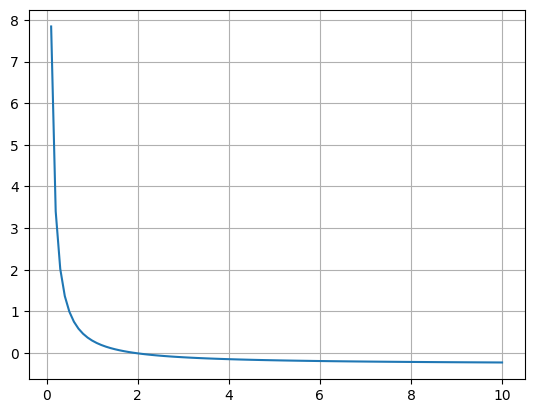

In [ ]:
fig, ax = plt.subplots(1,1)

xx = np.linspace(0.1, 10, 100)
yy = fML(xx)

ax.plot(xx, yy)
# ax.plot(xx, fML(xx))
ax.grid(True)
plt.show()

#For solving numerically, we will use scipy.optimize

In [ ]:
import scipy.optimize as sopt
sol = sopt.root_scalar(fML, bracket = [0.1,10])
sol.root

1.9458855585449453

In [ ]:
alphaML =  sol.root
betaML = alphaML/m1
print([alphaML, betaML])

[1.9458855585449453, 0.32632041946412377]


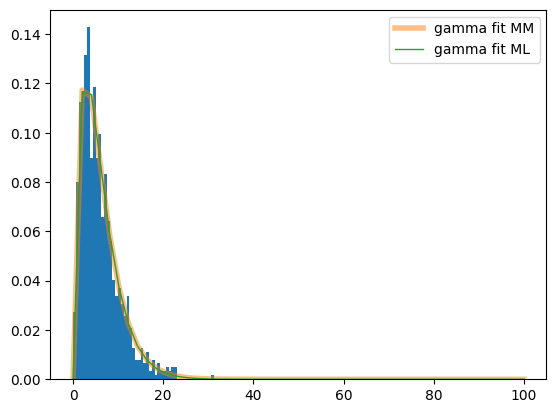

In [ ]:
fig,ax = plt.subplots(1,1)
ax.hist(x, density=True, bins=50)
xx = np.linspace(0,100,50)
ax.plot(xx, st.gamma.pdf(xx,alphaMM,scale=1/betaMM), lw='4', alpha=0.5, label='gamma fit MM')
ax.plot(xx, st.gamma.pdf(xx, alphaML, scale=1/betaML), lw='1', label='gamma fit ML')
ax.legend(loc ='best')
plt.show()
